Importing the libraries to be used

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Reading the dataset

In [4]:
df=pd.read_csv('craigslist_vehicles.csv')
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,303849,7307070484,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,5100,2009.0,NaN,saab 9-7x,fair,...,SUV,grey,https://images.craigslist.org/00b0b_dsIhheG86S...,For sale: 2009 Saab 9-7x Fair condition AWD ...,NaN,oh,39.937000,-82.031500,2021-04-15 00:00:00+00:00,2021-04-21 00:00:00+00:00
426876,303706,7314635557,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,7500,2011.0,ford,f-450,good,...,bus,red,https://images.craigslist.org/00b0b_8lBfNkZ6pr...,"2011 E-Ford 450 with 177k miles, 6.8 liter v-1...",NaN,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00
426877,303704,7314710341,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,25000,2016.0,chevrolet,silverado,excellent,...,truck,blue,https://images.craigslist.org/00k0k_jw0Pda6LTk...,2013 Silverado excellent condition. Blue in co...,NaN,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00
426878,303670,7316225330,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,6,1986.0,NaN,camaro iroc z28,good,...,NaN,red,https://images.craigslist.org/00Y0Y_avlrYDn7OY...,"1986 Iroc Z28 , T-tops , 86,500 miles , has ne...",NaN,oh,39.938630,-82.006760,2021-05-03 00:00:00+00:00,2021-05-08 00:00:00+00:00


Knowing the columns and rows in the dataset

In [5]:
df.shape

(426880, 28)

calculating the percentage of missing values

In [6]:
missing_values = df.isnull().sum()
total_values = df.size
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)

Unnamed: 0      0.000000
id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.010081
manufacturer    0.147633
model           0.044149
condition       1.456615
cylinders       1.486517
fuel            0.025208
odometer        0.036812
title_status    0.068955
transmission    0.021384
VIN             1.347334
drive           1.092370
size            2.563124
type            0.776883
paint_color     1.089324
image_url       0.000569
description     0.000586
county          3.571429
state           0.000000
lat             0.054791
long            0.054791
posting_date    0.000569
removal_date    0.000569
dtype: float64


Visualization of missing values

<Axes: >

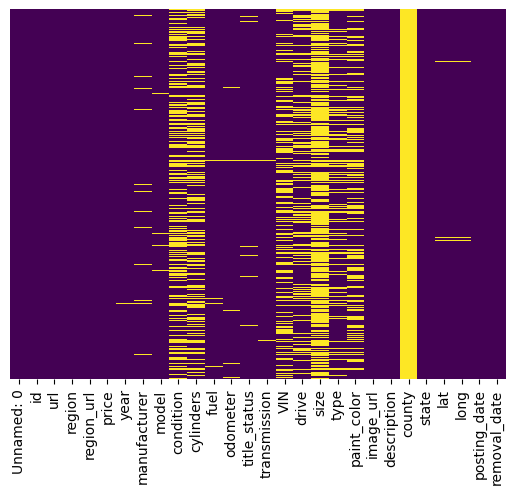

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df['year'] = df['year'].interpolate()
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
df['model'].ffill(inplace=True)
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['VIN'] = df['VIN'].fillna(df['VIN'].mode()[0])
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])
df['image_url'] = df['image_url'].fillna(df['image_url'].mode()[0])
df['description'] = df['description'].fillna(df['description'].mode()[0])
df['lat'] = df['lat'].fillna(df['lat'].mode()[0])
df['long'] = df['long'].fillna(df['long'].mode()[0])
df['posting_date'] = df['posting_date'].fillna(df['posting_date'].mode()[0])
df['removal_date'] = df['removal_date'].fillna(df['removal_date'].mode()[0])


In [17]:
new_df=df.drop('county', axis=1)


In [18]:
new_df.isnull().sum()

Unnamed: 0      0
id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
removal_date    0
dtype: int64

In [25]:
new_df['year'] = pd.to_datetime(df['year']).dt.date
new_df['posting_date'] = pd.to_datetime(new_df['posting_date']).dt.date
new_df['posting_time'] = pd.to_datetime(new_df['posting_date']).dt.time
new_df['removal_date'] = pd.to_datetime(new_df['removal_date']).dt.date
new_df['removal_time'] = pd.to_datetime(new_df['removal_date']).dt.time

In [24]:
new_df['year']

0         1970-01-01
1         1970-01-01
2         1970-01-01
3         1970-01-01
4         1970-01-01
             ...    
426875    1970-01-01
426876    1970-01-01
426877    1970-01-01
426878    1970-01-01
426879    1970-01-01
Name: year, Length: 426880, dtype: object

In [26]:
new_df.isnull().sum()

Unnamed: 0      0
id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
removal_date    0
posting_time    0
removal_time    0
dtype: int64

In [ ]:
sns.pairplot(
    new_df,
    x_vars=["condition", "model", "year"],
    y_vars=["condition", "model"],
)